<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-предобработка-данных" data-toc-modified-id="Обзор-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Генерация-и-отбор-признаков" data-toc-modified-id="Генерация-и-отбор-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Генерация и отбор признаков</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span></li></ul></li><li><span><a href="#Обучение-моделей-и-выбор-лучшей" data-toc-modified-id="Обучение-моделей-и-выбор-лучшей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей и выбор лучшей</a></span></li><li><span><a href="#Тестирование-итоговой-модели" data-toc-modified-id="Тестирование-итоговой-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование итоговой модели</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></div>

# Предсказание оттока клиентов телеком компании

**Описание проекта**: оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.
<br><br>
**Цель проекта:** предсказание оттока пользователей с помощью модели машинного обучения для удержания клиентов с помощтю дополнительных промокодов и специальных условий.
<br><br>
**Задачи проекта:**
* ознакомление с заданием на проект: определение решаемой задачи, метрик качества, требуемого результата;
* исследовательский анализ данных;
* предобработка данных;
* обучение моделей, выбор лучшей;
* тестирование лучшей модели;
* подготовка отчета с итоговыми выводами.

**Описание услуг оператора**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.


**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Обзор и предобработка данных

### Обзор данных

Импортируем необходимые для анализа инструменты:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from skimpy import skim
from phik.report import plot_correlation_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, precision_score, recall_score
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTENC

Загрузим доступные данные:

In [5]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')   

Проанализируем исходные данные с помощью функции skim() из библиотеки skimpy():

In [6]:
skim(contract)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA    ┃ NA %     ┃ mean    ┃ sd   ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ MonthlyCharges          │     0 │        0 │      65 │   30 │   18 │     36 │     90 │     120 │  █▃▄▇▇▃   │  │
│ └─────────────────────────┴───────┴──────────┴─────────┴──────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │      0 │         0 │                          1 │                  7000 │  │
│ │ BeginDate                        │      0 │         0 │                          1 │                  7000 │  │
│ │ EndDate                          │      0 │         0 │                          1 │                  7000 │  │
│ │ Type                             │      0 │         0 │                          1 │                  7000 │  │
│ │ PaperlessBilling                 │      0 │         0 │                          1 │                  7000 │  │
│ │ PaymentMethod                    │      0 │         0 │                          1 │                  7000 │  │
│ │ TotalCharges                     │      0 │         0 │                          1 │                  7000 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Целевой признак можно сформировать из столбца EndDate, проверим его уникальные значения:

In [7]:
contract['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: Int64

Проверим баланс классов в данных:

In [8]:
print('Доля ушедших клиентов:', round(contract.query('EndDate != "No"')['customerID'].count() / contract['customerID'].count(), 3))
print('Доля активных клиентов:', 1 - round(contract.query('EndDate != "No"')['customerID'].count() / contract['customerID'].count(), 3))

Доля ушедших клиентов: 0.265
Доля активных клиентов: 0.735


In [9]:
skim(internet)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5517   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 8      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │      0 │         0 │                          1 │                  5500 │  │
│ │ InternetService                  │      0 │         0 │                          1 │                  5500 │  │
│ │ OnlineSecurity                   │      0 │         0 │                          1 │                  5500 │  │
│ │ OnlineBackup                     │      0 │         0 │                          1 │                  5500 │  │
│ │ DeviceProtection                 │      0 │         0 │                          1 │                  5500 │  │
│ │ TechSupport                      │      0 │         0 │                          1 │                  5500 │  │
│ │ StreamingTV                      │      0 │         0 │                          1 │                  5500 │  │
│ │ StreamingMovies                  │      0 │         0 │                          1 │                  5500 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
skim(personal)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ SeniorCitizen         │     0 │       0 │    0.16 │    0.37 │    0 │      0 │      0 │       1 │  █    ▂   │  │
│ └───────────────────────┴───────┴─────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                │       0 │          0 │                            1 │                     7000 │  │
│ │ gender                    │       0 │          0 │                            1 │                     7000 │  │
│ │ Partner                   │       0 │          0 │                            1 │                     7000 │  │
│ │ Dependents                │       0 │          0 │                            1 │                     7000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
skim(phone)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6361   │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                   │      0 │          0 │                           1 │                    6400 │  │
│ │ MultipleLines                │      0 │          0 │                           1 │                    6400 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

**Предварительные выводы:**
* для выполнения проекта необходимо решить задачу бинарной классификации с ключевой метрикой ROC-AUC;
* целевую переменную необходимо создать из столбца `EndDate` таблицы `contract`;
* для большинства столбцов нарушены типы данных: `object` потребуется заменить на `int` и `float`;
* в отдельных таблицах отсутствуют пропуски, однако, при их объединении, части данных будет не хватать, необходимо будет это исправить;
* в данных отсутствуют дубликаты;
* явных выбросов на этапе предварительного анализа не обнаружено;
* присутствует дисбаланс классов.

### Предобработка данных

Объединим данные в единую таблицу для дальнейшего анализа:

In [12]:
df = contract.merge(personal, how='outer', on='customerID').merge(internet, how='outer', on='customerID').merge(phone, how='outer', on='customerID')
df.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
4504,8327-WKMIE,2017-01-01,No,One year,No,Credit card (automatic),20.15,785.75,Male,0,No,No,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,No
6333,8651-ENBZX,2014-11-01,2019-11-01 00:00:00,One year,Yes,Electronic check,106.00,6441.4,Female,1,No,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
5995,2193-SFWQW,2014-02-01,No,Two year,No,Bank transfer (automatic),111.95,8033.1,Male,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No
1028,8436-BJUMM,2017-11-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,83.75,2070.6,Male,0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Yes
2450,7602-MVRMB,2014-02-01,No,Two year,Yes,Bank transfer (automatic),110.45,8058.85,Female,0,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes


Исследуем основные параметры итогового датасета:

In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 20     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ MonthlyCharges         │    0 │       0 │      65 │      30 │   18 │     36 │     90 │     120 │  █▃▄▇▇▃   │  │
│ │ SeniorCitizen          │    0 │       0 │    0.16 │    0.37 │    0 │      0 │      0 │       1 │  █    ▂   │  │
│ └────────────────────────┴──────┴─────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA        ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                      │         0 │         0 │                         1 │                 7000 │  │
│ │ BeginDate                       │         0 │         0 │                         1 │                 7000 │  │
│ │ EndDate                         │         0 │         0 │                         1 │                 7000 │  │
│ │ Type                            │         0 │         0 │                         1 │                 7000 │  │
│ │ PaperlessBilling                │         0 │         0 │                         1 │                 7000 │  │
│ │ PaymentMethod                   │         0 │         0 │                         1 │                 7000 │  │
│ │ TotalCharges                    │         0 │         0 │                         1 │                 7000 │  │
│ │ gender                          │         0 │         0 │                         1 │                 7000 │  │
│ │ Partner                         │         0 │         0 │                         1 │                 7000 │  │
│ │ Dependents                      │         0 │         0 │                         1 │                 7000 │  │
│ │ InternetService                 │      1500 │        22 │                         1 │                 7000 │  │
│ │ OnlineSecurity                  │      1500 │        22 │                         1 │                 7000 │  │
│ │ OnlineBackup                    │      1500 │        22 │                         1 │                 7000 │  │
│ │ DeviceProtection                │      1500 │        22 │                         1 │                 7000 │  │
│ │ TechSupport                     │      1500 │       

Исследуем уникальные значения категориальных столбцов:

In [14]:
cat_cols = [x for x in df.columns.to_list() if x not in ['customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges']]
for col in cat_cols:
    print(col, '\n')
    print(df[col].value_counts())
    print(col, '\n')

Type 

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: Int64
Type 

PaperlessBilling 

Yes    4171
No     2872
Name: PaperlessBilling, dtype: Int64
PaperlessBilling 

PaymentMethod 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: Int64
PaymentMethod 

gender 

Male      3555
Female    3488
Name: gender, dtype: Int64
gender 

SeniorCitizen 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
SeniorCitizen 

Partner 

No     3641
Yes    3402
Name: Partner, dtype: Int64
Partner 

Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: Int64
Dependents 

InternetService 

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: Int64
InternetService 

OnlineSecurity 

No     3498
Yes    2019
Name: OnlineSecurity, dtype: Int64
OnlineSecurity 

OnlineBackup 

No     3088
Yes    2429
Name: OnlineBackup, dtype: Int64


Значения столбцов, содержащих бинарные признаки, можно заменить: вместо `No` будем использовать 0, вместо `Yes` - 1, мужской и женский пол закодируем 1 и 0 соответственно:

In [15]:
df = df.replace(['No', 'Yes', 'Male', 'Female'], [0, 1, 1, 0])
df.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
5041,4092-OFQZS,2018-06-01,0,One year,0,Mailed check,20.65,417.5,1,0,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
4018,2969-WGHQO,2019-07-01,0,One year,0,Electronic check,69.45,477.05,0,0,1,1,DSL,1,1,1,0,1,0,0
139,0390-DCFDQ,2019-10-01,2019-11-01 00:00:00,Month-to-month,1,Mailed check,70.45,70.45,0,1,1,0,Fiber optic,0,0,0,0,0,0,0
5896,1635-NZATJ,2014-03-01,0,Two year,0,Credit card (automatic),25.45,1789.65,1,1,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
2536,0203-HHYIJ,2017-09-01,2019-10-01 00:00:00,One year,0,Bank transfer (automatic),25.30,676.35,1,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1


Попробуем разобраться с пропусками. Вероятнее всего, пропуски связаны с тем, что некоторые клиенты пользуются только интернетом от компании или только телефонной связью, поэтому данные о них присутствуют только в соответствующих базах. Заполним эти пропуски нулями, означающими отсутствие использования услуги:

In [16]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: Int64

In [17]:
print(df.isna().sum())
df['InternetService'] = df['InternetService'].fillna('No')
df = df.fillna(0)
#Проверка
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

Приведем данные в столбце `BeginDate` к типу `DateTime`:

In [18]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')

В столбце `TotalCharges` присутствует аномальное значение, связанное с тем, что абоненты недавно начали пользоваться услугами оператора и еще не совершили ни одного платежа. Заменим этот пропуск на нулевое значение:

In [19]:
display(df.query('TotalCharges == " "').head(5))
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype('float')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,0,Two year,1,Bank transfer (automatic),52.55,,0,0,1,1,DSL,1,0,1,1,1,0,0
753,3115-CZMZD,2020-02-01,0,Two year,0,Mailed check,20.25,,1,0,0,1,No,0,0,0,0,0,0,0
936,5709-LVOEQ,2020-02-01,0,Two year,0,Mailed check,80.85,,0,0,1,1,DSL,1,1,1,0,1,1,0
1082,4367-NUYAO,2020-02-01,0,Two year,0,Mailed check,25.75,,1,0,1,1,No,0,0,0,0,0,0,1
1340,1371-DWPAZ,2020-02-01,0,Two year,0,Credit card (automatic),56.05,,0,0,1,1,DSL,1,1,1,1,1,0,0


Создадим столбец с целевой переменной из столбца `EndDate`, заменив данные с датой ухода клиента на метку 1:

In [20]:
df['Label'] = df['EndDate']
df.loc[(df['Label'] != 0), 'Label'] = 1
df['Label'] = df['Label'].astype('int')

Приведем данные в столбцах `Type`, `PaymentMethod` и `InternetService` к типу `category` для дальнейшего использования при обучении `CatBoostClassifier`:

In [21]:
df['Type'] = df['Type'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')
#Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   string        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   int64         
 9   SeniorCitizen     7043 non-null   int32         
 10  Partner           7043 non-null   int64         
 11  Dependents        7043 non-null   int64         
 12  InternetService   7043 non-null   category      
 13  OnlineSecurity    7043 non-null   int64         
 14  OnlineBackup      7043 n

### Генерация и отбор признаков

Создадим новый признак - количество дней пользования услугами оператора каждого клиента. Для этого заменим нули в столбце `EndDate` на дату выгрузки базы данных, приведем столбец к типу `DateTime` и посчитаем количество дней с момента `BeginDate`: 

In [22]:
df.loc[(df['EndDate'] == 0), 'EndDate'] = '2020-02-01'
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d')
df['ServiceDuration'] = (df['EndDate'] - df['BeginDate']).dt.days.astype('int')
df.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Label,ServiceDuration
6082,4523-WXCEF,2014-12-01,2019-11-01,Month-to-month,0,Electronic check,101.10,6039.90,0,0,...,Fiber optic,0,1,0,0,1,1,1,1,1796
3451,5397-TUPSH,2014-09-01,2020-02-01,One year,1,Bank transfer (automatic),70.95,4555.20,1,1,...,Fiber optic,0,0,0,0,0,0,0,0,1979
6734,8182-PNAGI,2019-01-01,2020-01-01,Month-to-month,0,Bank transfer (automatic),50.25,593.75,1,0,...,DSL,0,0,0,1,0,0,0,1,365
5731,4936-YPJNK,2019-04-01,2020-02-01,Month-to-month,1,Mailed check,19.90,199.45,0,0,...,No,0,0,0,0,0,0,0,0,306
1749,1320-REHCS,2015-10-01,2020-02-01,Month-to-month,1,Electronic check,110.75,5832.00,1,1,...,Fiber optic,0,1,1,1,1,1,1,0,1584


Удалим признаки, которые не влияют на целевую переменную и не пригодятся при обучении:

In [23]:
df = df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)
df.sample(5)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Label,ServiceDuration
4446,Month-to-month,1,Electronic check,79.90,260.90,1,1,0,0,Fiber optic,0,0,0,0,1,0,0,1,92
1982,Month-to-month,0,Mailed check,19.95,268.40,1,0,0,1,No,0,0,0,0,0,0,0,0,427
5463,Month-to-month,1,Bank transfer (automatic),44.35,44.35,0,0,1,1,DSL,0,0,0,0,0,0,0,1,30
6809,Month-to-month,0,Electronic check,74.95,308.70,1,1,1,0,Fiber optic,0,0,0,0,0,0,1,1,123
5274,One year,1,Credit card (automatic),108.10,7181.95,0,1,1,0,Fiber optic,0,1,1,1,1,1,1,0,2010


### Исследовательский анализ данных

Проанализируем исходные данные подробнее. Построим гистограммы числовых признаков:

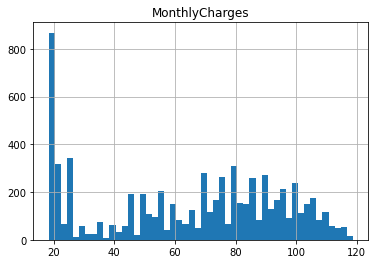

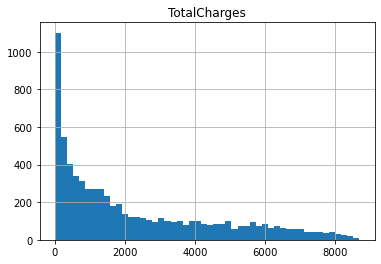

In [24]:
for col in ['MonthlyCharges', 'TotalCharges']:
    df[col].hist(bins=50)
    plt.title(col)
    plt.show()

Чаще всего люди тратят не более 20 у.е. ежемесячно. У компании сравнительно мало старых клиентов, что видно по гистограмме сумм, потраченных клиентами за все время.

Проанализируем влияние категориальных признаков на факт ухода клиента с помощью диаграмм:

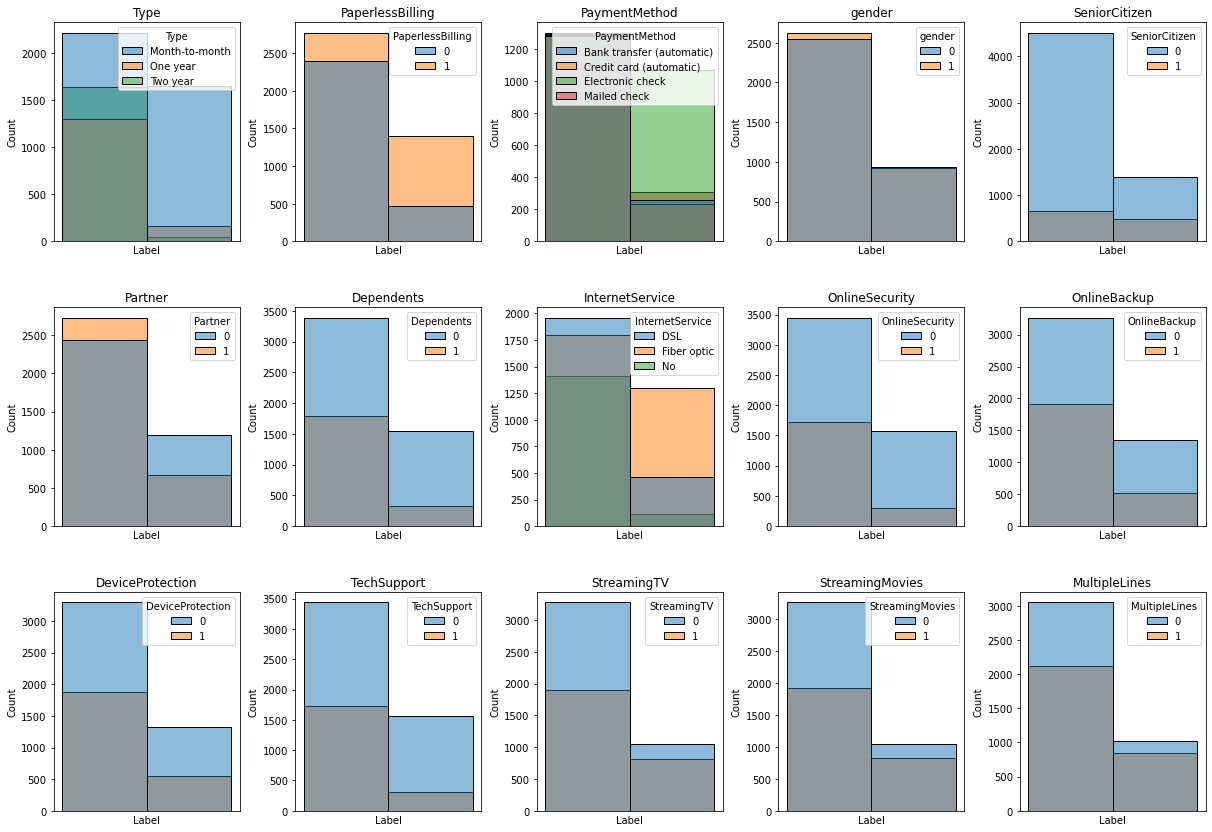

In [25]:
plt.figure(figsize=[20, 15])
plt.subplots_adjust(left=0.13, right=0.93, top=1.0, bottom= 0.27, wspace= 0.3, hspace=0.3)
for i, col in enumerate(cat_cols):
    plt.subplot(3, 5, i+1)
    plt.histplot(data=df, x="Label", hue=col, discrete=True)
    plt.xticks([])
    plt.title(col)

Наибольшая разница между ушедшими и оставшимися клиентами прослеживается для следующих признаков:
* `Type` - большинство ушедших клиентов платили помесячно;
* `PaperlessBilling` - большинство ушедших клиентов использовали безналичную оплату;
* `PaymentMethod` -  большинство ушедших клиентов использовали electronic check как метод оплаты;
* `InternetService` -  большинство ушедших клиентов использовали оптоволокно.

Проверим корреляцию признаков друг с другом и с целевой переменной:

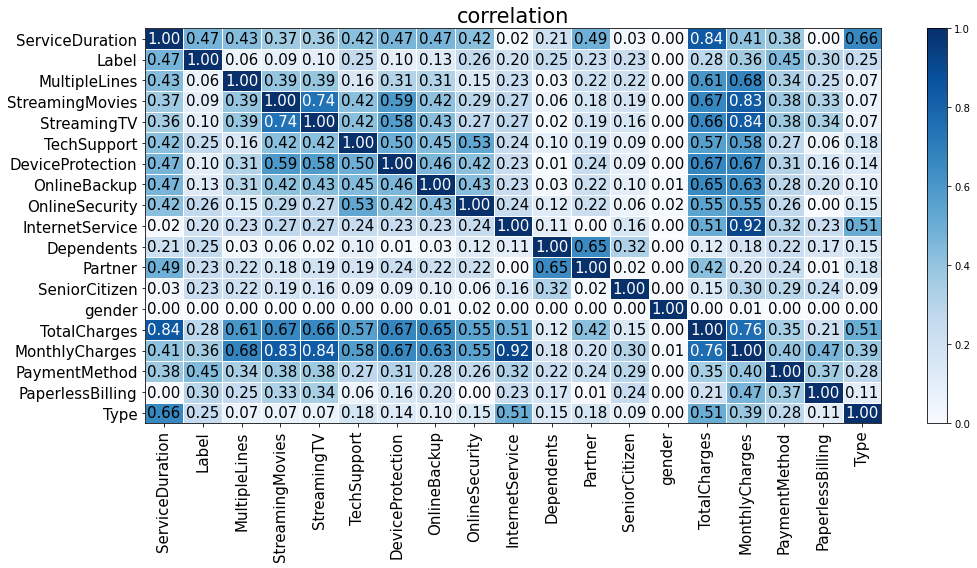

In [26]:
phik_overview = df.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'ServiceDuration'])
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', fontsize_factor=1.5,
                        figsize=(15,8))
plt.tight_layout()

Видно, что между собой сильно коррелируют следующие пары столбцов: 
* `StreamingMovies` и `StreamingTV`;
* `MonthlyCharges` и `TotalCharges`;
* `TotalCharges` и `ServiceDuration`;
* `MonthlyCharges` и `StreamingTV`;
* `MonthlyCharges` и `StreamingMovies`;
* `MonthlyCharges` и `InternetService`.

Для улучшения качества предсказаний удалим столбцы `TotalCharges`, `StreamingTV` и `InternetService`. Так `gender`, т.к. он не влияет на целевой признак.

In [27]:
df = df.drop(['TotalCharges', 'StreamingTV', 'InternetService', 'gender'], axis=1)

### Подготовка данных для моделей

Выделим признаки и целевой признак:

In [28]:
features = df.drop(['Label'], axis=1)
target = df['Label']

Разделим выборку на обучающую и тестовую:

In [29]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=101022, test_size=0.25,
                                                                            stratify=target, shuffle=True)
features_train.shape, features_test.shape

((5282, 14), (1761, 14))

В данных присутствует дисбаланс классов, устраним его с помощью `SMOTENC`:

In [30]:
SMOTE = SMOTENC(categorical_features=[0, 2])
features_train_upsampled, target_train_upsampled = SMOTE.fit_resample(features_train, target_train)
target_train_upsampled.value_counts()

0    3880
1    3880
Name: Label, dtype: int64

Закодируем категориальные признаки `Type`, `PaymentMethod` для обучения модели логистической регрессии с помощью One-Hot Encoding:

In [31]:
features_train_ohe = pd.get_dummies(features_train_upsampled, columns=['Type', 'PaymentMethod'], drop_first=True)
features_test_ohe = pd.get_dummies(features_test, columns=['Type', 'PaymentMethod'], drop_first=True)
features_train_ohe.head()

,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,MultipleLines,ServiceDuration,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,59.70,0,1,1,0,1,0,1,0,1,702,0,1,0,0,1
1,0,110.45,0,0,0,0,1,1,1,1,1,914,1,0,1,0,0
2,0,54.90,0,1,1,0,0,1,0,0,1,1523,1,0,0,0,0
3,0,64.35,0,0,0,1,1,0,0,1,0,1036,1,0,0,1,0
4,0,107.95,0,1,0,0,0,1,1,1,1,1737,0,1,0,1,0


Масштабируем признаки с помощью `StandardScaler`, чтобы уравнять вклад переменных, значения которых различаются на несколько порядков:

In [32]:
scaler = StandardScaler()
scaler.fit(features_train_ohe[['MonthlyCharges', 'ServiceDuration']])
features_train_scaled = features_train_ohe.copy()
features_test_scaled = features_test_ohe.copy()
features_train_scaled[['MonthlyCharges', 'ServiceDuration']] = scaler.transform(features_train_ohe[['MonthlyCharges', 'ServiceDuration']])
features_test_scaled[['MonthlyCharges', 'ServiceDuration']] = scaler.transform(features_test_ohe[['MonthlyCharges', 'ServiceDuration']])
features_train_scaled.head()

,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,MultipleLines,ServiceDuration,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.284050,0,1,1,0,1,0,1,0,1,-0.203047,0,1,0,0,1
1,0,1.486836,0,0,0,0,1,1,1,1,1,0.086076,1,0,1,0,0
2,0,-0.451543,0,1,1,0,0,1,0,0,1,0.916624,1,0,0,0,0
3,0,-0.121792,0,0,0,1,1,0,0,1,0,0.252459,1,0,0,1,0
4,0,1.399600,0,1,0,0,0,1,1,1,1,1.208476,0,1,0,1,0


**Вывод**

На этапе анализа и предобработки данных выполнено следующее:
* предобработка данных (данные объединены в единую таблицу, исправлены типы данных, обработаны пропуски);
* исследовательский анализ данных (данные визуализированы, выявлены закономерности, проверена корреляция признаков);
* сгенерированы дополнительные признаки и удалены лишние;
* данные подготовлены для моделей машинного обучения (устранен дисбаланса, масштабированы числовые признаки, закодированы категориальные признаки, выборка разбита на тренировочную, валидационную и тестовую части).

## Обучение моделей и выбор лучшей

Создадим функцию для визуализации ROC кривой, построенное с помощью функции `rov_curve`:

In [33]:
def make_roc_curve(target, predictions):
    fpr, tpr, thresholds = roc_curve(target, predictions)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

Найдем лучшие параметры для `CatBoostClassifier` с помощью `GridSearchCV`:

{'depth': 6, 'learning_rate': 0.1} 0.9155029229057805


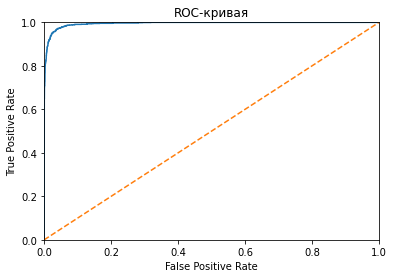

In [34]:
model_cbc = CatBoostClassifier(verbose=0, random_state=101022, cat_features=['Type', 'PaymentMethod'])
parameters = {'learning_rate': [0.1, 0.2], 'depth' : [6, 10]}
grid_cbc = GridSearchCV(model_cbc, parameters, scoring='roc_auc', cv=5)
grid_cbc.fit(features_train, list(target_train))

scores = []
scores.append(grid_cbc.best_score_)

print(grid_cbc.best_params_, grid_cbc.best_score_)
make_roc_curve(list(target_train), grid_cbc.best_estimator_.predict_proba(features_train)[:, 1])

Проанализируем важность признаков для модели:

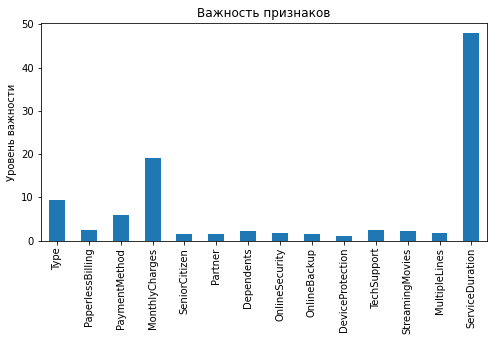

In [35]:
model_importances = pd.Series(grid_cbc.best_estimator_.feature_importances_, index=features.columns)
model_importances.plot.bar(figsize=(8,4))
plt.title('Важность признаков')
plt.ylabel('Уровень важности');

Самыми важными признаками модель `CatBoostClassifier` считает длительность пользования услугами оператора, тип оплаты и ежемесячный платеж.

Обучим логистическую регрессию:

{'C': 0.3, 'max_iter': 400} 0.8703267627644783


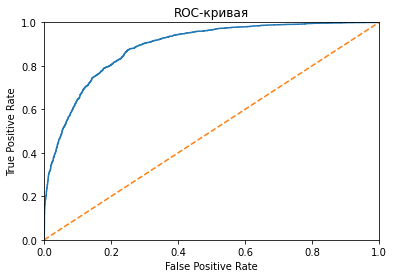

In [36]:
model_lr = LogisticRegression(random_state=101022)
parameters = {'C' : [0.3, 0.5, 0.7], 'max_iter' : [400, 600, 800]}
grid_lr = GridSearchCV(model_lr, parameters, scoring='roc_auc', cv=3)
grid_lr.fit(features_train_scaled, list(target_train_upsampled))
scores.append(grid_lr.best_score_)

print(grid_lr.best_params_, grid_lr.best_score_)
make_roc_curve(list(target_train_upsampled), grid_lr.best_estimator_.predict_proba(features_train_scaled)[:, 1])

Проанализируем важность признаков для модели:

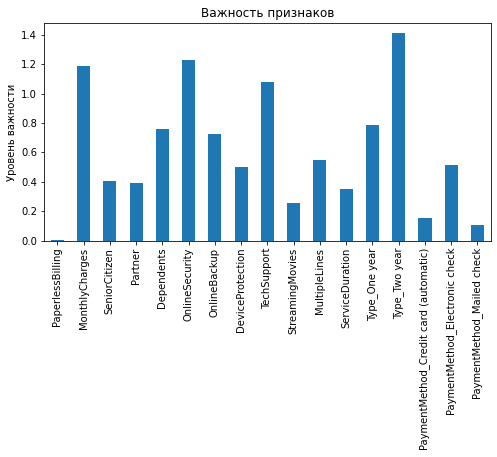

In [37]:
model_importances = pd.Series(abs(grid_lr.best_estimator_.coef_[0]), index=features_train_scaled.columns)
model_importances.plot.bar(figsize=(8,4))
plt.title("Важность признаков")
plt.ylabel("Уровень важности");

Самыми важными признаками модель логистической регрессии считает тип оплаты, месячный платеж, услуги безопасности и поддержки, тип интернет соединения.

Обучим модель случайного леса:

{'max_depth': 8, 'n_estimators': 100} 0.9055375836964608


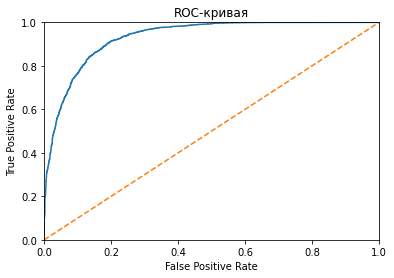

In [38]:
model_rfc = RandomForestClassifier(random_state=101022)
parameters = {'n_estimators': [10, 50, 100], 'max_depth' : [3, 6, 8]}
grid_rfc = GridSearchCV(model_rfc, parameters, scoring='roc_auc', cv=5)
grid_rfc.fit(features_train_ohe, list(target_train_upsampled))
scores.append(grid_rfc.best_score_)

print(grid_rfc.best_params_, grid_rfc.best_score_)
make_roc_curve(list(target_train_upsampled), grid_rfc.best_estimator_.predict_proba(features_train_ohe)[:, 1])

Проанализируем важность признаков для модели:

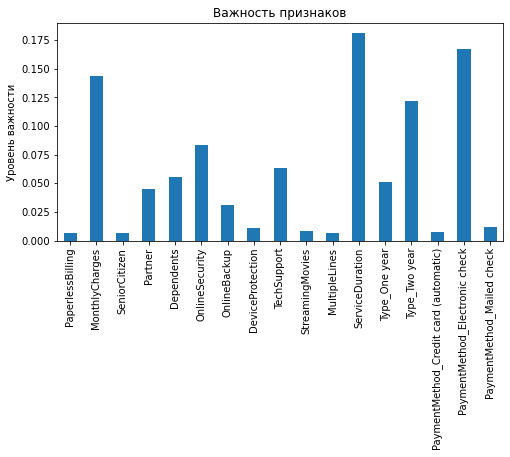

In [39]:
model_importances = pd.Series(grid_rfc.best_estimator_.feature_importances_, index=features_train_ohe.columns)
model_importances.plot.bar(figsize=(8,4))
plt.title('Важность признаков')
plt.ylabel('Уровень важности');

Самыми важными признаками модель `RandomForestClassifier` считает длительность пользования услугами оператора, тип оплаты, ежемесячный платеж.

Итоговые результаты моделей:

,AUC ROC
CatBoostClassifier,0.915503
LogisticRegressor,0.870327
RandomForestClassifier,0.905538


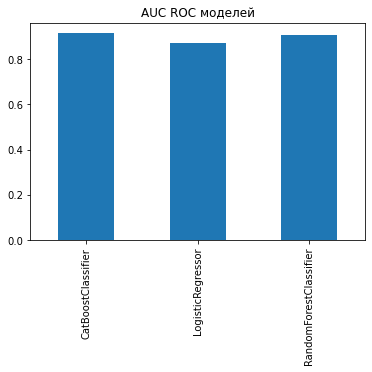

In [40]:
final_df = pd.DataFrame(data=list(zip(scores)), index=['CatBoostClassifier', 'LogisticRegressor', 'RandomForestClassifier'], columns=['AUC ROC'])
final_df['AUC ROC'].plot(kind='bar', figsize=(6, 4))
plt.title('AUC ROC моделей')
final_df

**Вывод**

Лучшие результаты на кросс-валидации показала модель `CatBoostClassifier` с AUC ROC = 0.92. Самыми важными признаками модель считает длительность пользования услугами оператора, тип оплаты и ежемесячный платеж.

## Тестирование итоговой модели

Проверим лучшую модель на тестовых данных:

Итоговые результаты предсказаний модели:
AUC ROC = 0.9148094152222909 
Accuracy = 0.8750709823963657      
Precision = 0.8365122615803815 
Recall = 0.6573875802997858


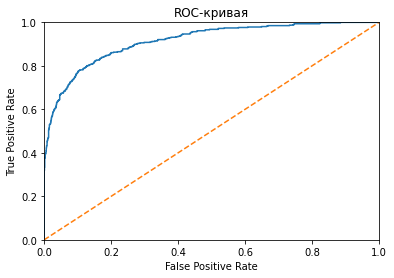

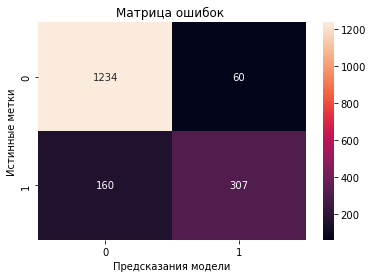

In [41]:
roc_auc = roc_auc_score(list(target_test), grid_cbc.best_estimator_.predict_proba(features_test)[:, 1])
accuracy = accuracy_score(list(target_test), grid_cbc.best_estimator_.predict(features_test))
precision = precision_score(list(target_test), grid_cbc.best_estimator_.predict(features_test))
recall = recall_score(list(target_test), grid_cbc.best_estimator_.predict(features_test))
print(f'Итоговые результаты предсказаний модели:\nAUC ROC = {roc_auc} \nAccuracy = {accuracy} \
     \nPrecision = {precision} \nRecall = {recall}')
make_roc_curve(list(target_test), grid_cbc.best_estimator_.predict_proba(features_test)[:, 1])
plt.show()

matrix = pd.DataFrame(confusion_matrix(target_test, grid_cbc.best_estimator_.predict(features_test)))

sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Матрица ошибок ')
plt.xlabel('Предсказания модели')
plt.ylabel('Истинные метки')
plt.show()

**Вывод**

Модель `CatBoostClassifier` на тестовой выборке показала следующие результаты: AUC ROC = 0.915, Accuracy = 0,875, что сравнимо с результатом, полученные с помощью кросс-валидации на обучающей выборке, что означает, что модель не переообучилась и сохранила способность обобщать. 

Модель ошибается в 12,5% случаях, что является хорошим показателем. Она имеет достаточно высокий показатель Precision, а значит, редко предсказывает уходящих клиентов неправильно (показатель False Positive низкий, ошибка первого рода совершается редко). Соответственно, если модель присвоила клиенту метку уходящего, с высокой вероятностью он действительно уйдет и этому прогнозу можно доверять.

## Итоговые выводы

В ходе работы выполнено следующее:
* первичный анализ исходных данных, выявлено следующее: в данных отсутствуют пропуски и дубликаты, баланс классов не соблюдается - ушедших клиентов примерно в три раза меньше;
* предобработка данных (данные объединены в единую таблицу, исправлены типы данных, обработаны пропуски);
* исследовательский анализ данных (данные визуализированы, выявлены закономерности, проверена корреляция признаков);
сгенерированы дополнительные признаки и удалены лишние;
* данные подготовлены для моделей машинного обучения (устранен дисбаланса, масштабированы числовые признаки, закодированы категориальные признаки, выборка разбита на тренировочную, валидационную и тестовую части);
* подобраны гиперпараметры и обучены следующие модели:
    * модель логистической регрессии с метрикой AUC ROC на валидационной выборке, равной 0,87;
    * модель решающего леса с AUC ROC = 0,9;
    * модель CatBoostClassifier с AUC ROC = 0,92;
* выбрана и протестирована лучшая модель.
    
Лучший результат классификации пользователей показала модель CatBoostClassifier с AUC ROC равным 0,918 и Accuracy равной 0,875 на тестовой выборке со следующими гиперпараметрами:
* depth = 6;
* learning_rate = 0.1.

Модель ошибается в 12,5% случаях, что является хорошим показателем. Она имеет достаточно высокое значение точности, а значит, редко предсказывает уходящих клиентов неправильно (показатель False Positive низкий, ошибка первого рода совершается редко). Соответственно, если модель присвоила клиенту метку уходящего, с высокой вероятностью он действительно уйдет и этому прогнозу можно доверять. Однако, показатель полноты недостаточно высок (много False Negative предсказаний), следовательно, модель выявляет не всех клиентов, планирующих уход, т.е. совершает ошибку второго рода.

Выявлено, что на уход клиента сильнее всего влияют: 
* длительность пользования услугами оператора - старые клиенты уходят реже новых;
* тип оплаты - клиенты, которые платят помесячно, уходят чаще;
* ежемесячный платеж - клиенты с маленьким платежом уходят реже.